In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import t


In [2]:
final_data = pd.read_csv('problem1.tsv', delimiter='\t', header=None)
final_data

,0,1
0,0.072435,0.004788
1,-0.093958,0.118346
2,1.637295,0.021868
3,0.266178,-0.042178
4,0.672105,-0.403411
...,...,...
195,9.864852,8.486013
196,9.934785,9.162691
197,11.232787,8.870784
198,7.948785,10.471377


# Question 1

### (a) Implement the pj|i matrix.

In [27]:
# for part (a)
def compute_neighbors_for_p(data, x_i, sigma_sq):
    x_ = data[x_i]
    list_of_neighbors = []

    for i in range(data.shape[0]):
        if i != x_i:
            neighbor = data[i]
            distance = np.exp(-math.dist(x_ , neighbor) ** 2 / 2 * sigma_sq)

            list_of_neighbors.append(distance)

    return list_of_neighbors

def compute_p_x_on_y(data, x_i, x_j, sigma_sq):
    x_1 = data[x_i]
    x_2 = data[x_j]
    numerator = np.exp(-math.dist(x_1, x_2) ** 2 / 2 * sigma_sq)
    denominator = 0
    neighbors = compute_neighbors_for_p(data, x_i, sigma_sq)
    for i in neighbors:
        denominator+=i


    p_ij = numerator / denominator

    return p_ij

# for part (b)
def compute_p_ij(data, sigma_sq):
    num_pts = data.shape[0]
    matrix = np.zeros((num_pts, num_pts))
    for i in range(num_pts):
        for j in range(num_pts):
            if i != j:
                p_i_on_j = compute_p_x_on_y(np.array(data), i, j, sigma_sq)
                p_j_on_i = compute_p_x_on_y(np.array(data), j, i, sigma_sq)
                p_ij =  (p_j_on_i + p_i_on_j) / (2 * num_pts)
                matrix[i][j] = p_ij
    
    return matrix

In [4]:
# part (a)
q1_matrix = np.zeros((final_data.shape[0],final_data.shape[0]))
for i in range(final_data.shape[0]):
    for j in range(final_data.shape[0]):        
        if(i != j):
            q1_matrix[i][j] = compute_p_x_on_y(np.array(final_data), i, j, 0.1)

q1_matrix

array([[0.00000000e+00, 1.11432421e-02, 9.87897255e-03, ...,
        4.32856653e-07, 2.09865903e-06, 1.54294253e-07],
       [1.11590305e-02, 0.00000000e+00, 9.62102601e-03, ...,
        3.97332071e-07, 2.07193743e-06, 1.45968728e-07],
       [1.10430613e-02, 1.07395032e-02, 0.00000000e+00, ...,
        2.49221596e-06, 7.24747601e-06, 8.08724239e-07],
       ...,
       [4.96880956e-07, 4.55456574e-07, 2.55927069e-06, ...,
        0.00000000e+00, 6.57633760e-03, 1.07907962e-02],
       [2.49249426e-06, 2.45727644e-06, 7.70018862e-06, ...,
        6.80405986e-03, 0.00000000e+00, 9.28792966e-03],
       [1.56762158e-07, 1.48093639e-07, 7.35045524e-07, ...,
        9.55073333e-03, 7.94544304e-03, 0.00000000e+00]])

In [99]:
for i in range(len(q1_matrix)):
    print(' index',i, 'the sume is:',q1_matrix[i].sum())

 index 0 the sume is: 1.0
 index 1 the sume is: 1.0
 index 2 the sume is: 0.9999999999999988
 index 3 the sume is: 0.9999999999999994
 index 4 the sume is: 0.9999999999999999
 index 5 the sume is: 1.0000000000000009
 index 6 the sume is: 0.9999999999999999
 index 7 the sume is: 0.9999999999999998
 index 8 the sume is: 1.0000000000000004
 index 9 the sume is: 0.9999999999999996
 index 10 the sume is: 1.0000000000000004
 index 11 the sume is: 1.0000000000000009
 index 12 the sume is: 1.0000000000000004
 index 13 the sume is: 1.0000000000000004
 index 14 the sume is: 0.9999999999999992
 index 15 the sume is: 0.9999999999999998
 index 16 the sume is: 1.0000000000000009
 index 17 the sume is: 0.9999999999999998
 index 18 the sume is: 0.9999999999999996
 index 19 the sume is: 0.9999999999999998
 index 20 the sume is: 0.9999999999999999
 index 21 the sume is: 0.9999999999999998
 index 22 the sume is: 0.9999999999999981
 index 23 the sume is: 0.9999999999999996
 index 24 the sume is: 0.9999999

### (b). Implement the pij matrix

In [84]:
# part (b)

q2_matrix = compute_p_ij(final_data, 0.1)
q2_matrix

array([[0.00000000e+00, 5.57556814e-05, 5.23050847e-05, ...,
        2.32434402e-09, 1.14778832e-08, 7.77641027e-10],
       [5.57556814e-05, 0.00000000e+00, 5.09013231e-05, ...,
        2.13197161e-09, 1.13230347e-08, 7.35155918e-10],
       [5.23050847e-05, 5.09013231e-05, 0.00000000e+00, ...,
        1.26287166e-08, 3.73691616e-08, 3.85942441e-09],
       ...,
       [2.32434402e-09, 2.13197161e-09, 1.26287166e-08, ...,
        0.00000000e+00, 3.34509936e-05, 5.08538239e-05],
       [1.14778832e-08, 1.13230347e-08, 3.73691616e-08, ...,
        3.34509936e-05, 0.00000000e+00, 4.30834318e-05],
       [7.77641027e-10, 7.35155918e-10, 3.85942441e-09, ...,
        5.08538239e-05, 4.30834318e-05, 0.00000000e+00]])

In [85]:
q2_matrix.sum()

1.0

### (c) Using σ 2 = 1, plot the entire dataset and color the points based on their probability relative to the first data point. To be rigorous: p1j is the vector of probabilities of “j picking 1 as its neighbor”. A reasonable color scale might be: wj ∝ p1j/maxk(p1k). Your plot should show a change of color away from the first data point. Do the same for σ 2 = {0.1, 10, 100}. Each plot might look something like this:

In [86]:
# part (c)
q3_matrix_1 = q2_matrix
q3_matrix_2 = compute_p_ij(final_data, 1)
q3_matrix_3 = compute_p_ij(final_data, 10)
q3_matrix_4 = compute_p_ij(final_data, 100)

In [114]:
print(q3_matrix_1.sum(), q3_matrix_2.sum(), q3_matrix_3.sum(), q3_matrix_4.sum())

1.0 1.0 1.0 1.0


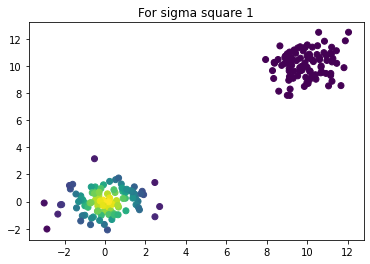

In [113]:
p_1j = q3_matrix_2[:,0]

color_scale = p_1j / max(p_1j)

plt.title('For sigma square 1')
plt.scatter(final_data[0], final_data[1], c=color_scale)

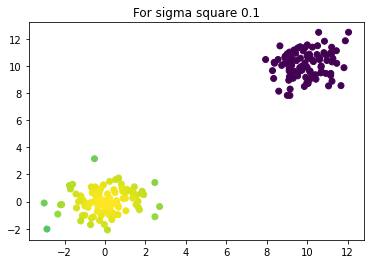

In [115]:
p_1j = q3_matrix_1[:,0]

color_scale = p_1j / max(p_1j)

plt.title('For sigma square 0.1')
plt.scatter(final_data[0], final_data[1], c=color_scale)

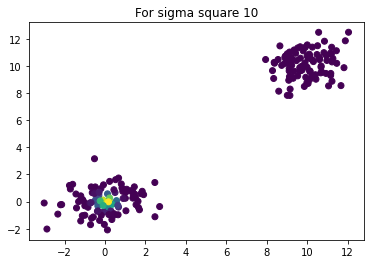

In [116]:
p_1j = q3_matrix_3[:,0]

color_scale = p_1j / max(p_1j)

plt.title('For sigma square 10')
plt.scatter(final_data[0], final_data[1], c=color_scale)

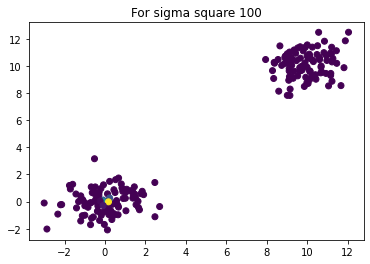

In [122]:
p_1j = q3_matrix_4[:,0]

color_scale = p_1j / max(p_1j)

plt.title('For sigma square 100')
plt.scatter(final_data[0], final_data[1], c=color_scale)

### (d) Implement the qij matrix. Sanity check: the entire matrix should sum to 1.

In [78]:
def compute_neighbors_for_q(data, y_i):
    y_ = data[y_i]
    list_of_neighbors = []

    for i in range(data.shape[0]):
        if i != y_i:
            neighbor = data[i]
            distance = (1+math.dist(y_,neighbor)**2)**(-1)

            list_of_neighbors.append(distance)

    return list_of_neighbors

def compute_q_x_on_y(data, y_i, y_j):
    y_1 = data[y_i]
    y_2 = data[y_j]
    numerator = (1+math.dist(y_1,y_2)**2)**(-1)
    denominator = 0
    neighbors = compute_neighbors_for_q(data, y_i)
    for i in neighbors:
        denominator+=i

    q_ij = numerator / denominator

    return q_ij


def compute_q_ij(data):
    num_pts = data.shape[0]
    matrix = np.zeros((num_pts, num_pts))

    for i in range(num_pts):
        for j in range(num_pts):
            if i != j:
                q_ij = compute_q_x_on_y(np.array(data), i, j)
                matrix[i][j] = q_ij / num_pts

    return matrix


In [79]:
q_ij_matrix = compute_q_ij(final_data)
q_ij_matrix

array([[0.00000000e+00, 1.06896454e-04, 3.22505347e-05, ...,
        5.44841927e-07, 6.44515285e-07, 4.94837171e-07],
       [1.07766725e-04, 0.00000000e+00, 2.79892351e-05, ...,
        5.44633176e-07, 6.48692712e-07, 4.96353642e-07],
       [4.76452450e-05, 4.10159039e-05, 0.00000000e+00, ...,
        9.58893560e-07, 1.09534894e-06, 8.47569944e-07],
       ...,
       [1.00804851e-06, 9.99524899e-07, 1.20087739e-06, ...,
        0.00000000e+00, 1.43450728e-05, 4.63284128e-05],
       [1.29427116e-06, 1.29214034e-06, 1.48888756e-06, ...,
        1.55698309e-05, 0.00000000e+00, 2.75001201e-05],
       [5.46778542e-07, 5.44025144e-07, 6.33931088e-07, ...,
        2.76685026e-05, 1.51318381e-05, 0.00000000e+00]])

In [80]:
q_ij_matrix.sum()

1.0

### (e) Plot the entire dataset and color the points based on their q1j probability relative to the first data point. How is it different than the p1j plot from (c) when σ 2 i = 1?

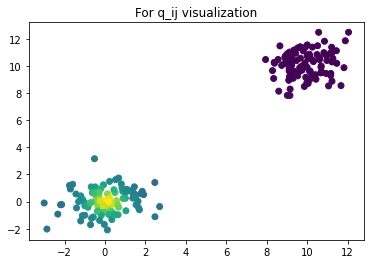

In [82]:
p_1j = q_ij_matrix[:,0]

plt.title('For q_ij visualization')
plt.scatter(final_data[0], final_data[1], c=p_1j)

###  (f). Implement the KL-divergence. Note, the contribution of {ij} is zero when pij = 0.

In [36]:
def kl_divergence(p_matrix, q_matrix):
    sum = 0
    for i in range(p_matrix.shape[0]):
        for j in range(q_matrix.shape[0]):
            if p_matrix[i][j] != 0 and q_matrix[i][j] != 0: # if q is 0 then undefined division, if p is 0, then there's no contribution of {ij} we can ignore it
                sum = sum + p_matrix[i][j] * math.log(p_matrix[i][j] / q_matrix[i][j])

    return sum

### (g). Using the real data as the low-dimensional projection, compute the KL-divergence when:

In [87]:
q_matrix = q_ij_matrix 
p_matrix_1 = q2_matrix #here the sigma i tested in q2 is 0.1
p_matrix_2 = q3_matrix_2 #where the sigma is 1
p_matrix_3 = q3_matrix_4 #where the sigma is 100

In [88]:
kl_divergence(p_matrix_1, q_matrix)

0.14626369654805382

In [89]:
kl_divergence(p_matrix_2, q_matrix)

0.10326654539714238

In [90]:
kl_divergence(p_matrix_3, q_matrix)

2.8104061903535453

### (h). Using σ2 = 1, can you find a projection that reduces the KL-divergence? Note, there are plenty linear or non-linear ones. The easiest might be to do might be ‘move’ one cluster. Plot the projection and report the KL-divergence.